In [13]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
# """
#     Created by Mohsen Naghipourfar on 7/23/18.
#     Email : mn7697np@gmail.com or naghipourfar@ce.sharif.edu
#     Website: http://ce.sharif.edu/~naghipourfar
#     Github: https://github.com/naghipourfar
#     Skype: mn7697np
# """

In [60]:
tickers = ['AAPL', 'MSFT', '^GSPC']  # Apple, Microsoft and S&P500 index

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2013-01-01'
end_date = '2016-12-31'

panel_data = data.DataReader('INPX', 'iex', start_date, end_date)
# ''' returns a panel object (3D Object)
#     1st dim: various fields of finance -> open, close, high, low, ...
#     2nd dim: date
#     3rd dim: instrument identifiers 
# '''
panel_data.head()
all_weekends = pd.date_range(start_date, end_date, freq='B')
close = panel_data['close']
# close = close.reindex(all_weekends)
close = close.fillna(method='ffill')
close = close.fillna(method='bfill')
close = close.fillna(method='backfill')

5y


In [69]:
short_rolling = close.rolling(window=20).mean()
long_rolling = close.rolling(window=100).mean()
# short_rolling.head(20)

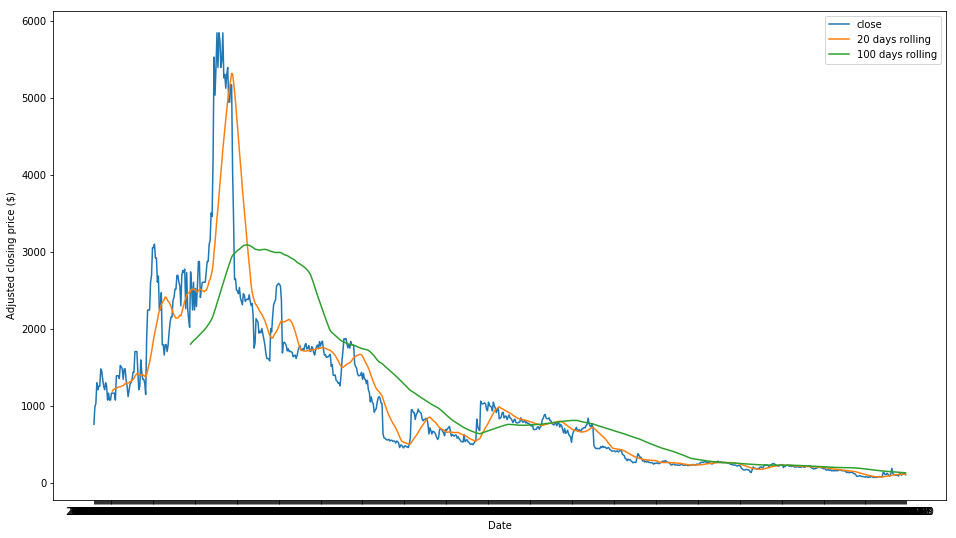

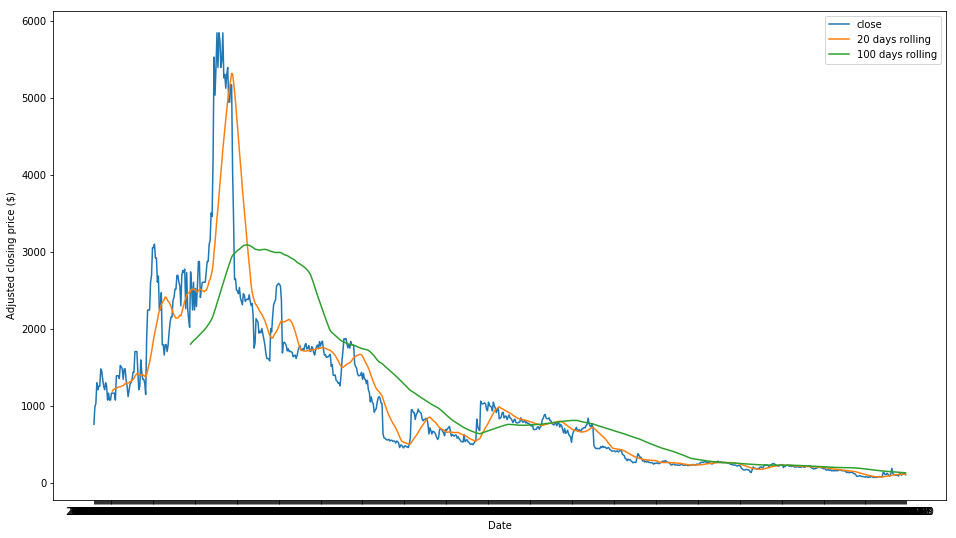

In [66]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label='close')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
plt.show()